In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.colors as mcolors

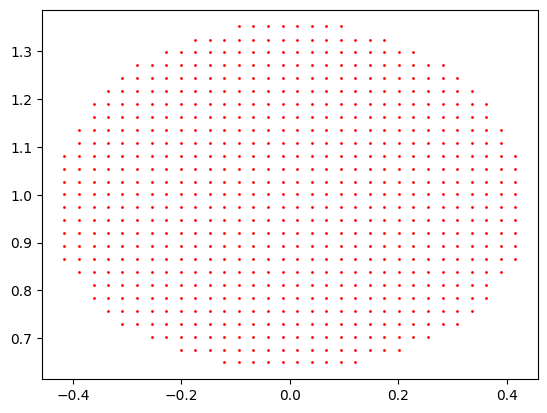

In [4]:
path = 'velocity_fields/alpha_0.4_2D/'
Ux_file = np.load(path + 'Ux.npy').T
Ur_file = np.load(path + 'Uy.npy').T

x_2D = np.load(path + 'x.npy')
r_2D = np.load(path + 'y.npy')
X_2D, R_2D = np.meshgrid(x_2D, r_2D)
int_points = np.vstack([X_2D.ravel(), R_2D.ravel()]).T

# Ux_file = Ux_file[:,r_2D>0]
# Ur_file = Ur_file[:,r_2D>0]
# r_2D = r_2D[r_2D>0]

geometry_2D = np.load(path + 'geometry.npy')

x_core_2d, y_core_2d, _, x_ring_2d, y_ring_2d = geometry_2D.T


upper_core = Path(np.vstack([x_core_2d, y_core_2d]).T).contains_points(int_points)
upper_points = int_points[upper_core]

x_incore_2d = upper_points[:, 0].astype(np.float16)
y_incore_2d = upper_points[:, 1].astype(np.float16)
plt.scatter(x_incore_2d, y_incore_2d, c='r', s=1)

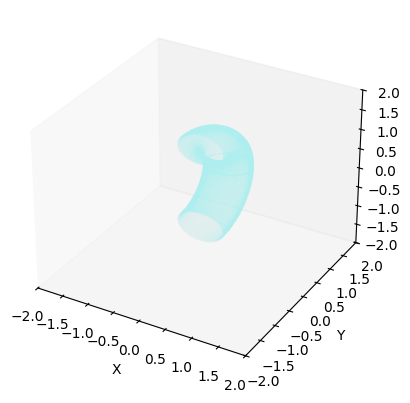

In [11]:
theta = np.linspace(0, 2*np.pi, 181)
Theta = np.repeat(theta[np.newaxis, :], x_core_2d.size, axis=0)
Z_core_2d = y_core_2d[:, np.newaxis] * np.sin(Theta)
Y_core_2d = y_core_2d[:, np.newaxis] * np.cos(Theta)
X_core_2d = np.repeat(x_core_2d[:, np.newaxis], len(theta), axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
k_theta = len(theta) // 4
cross_section_x = np.concatenate((X_core_2d[:, -k_theta:], X_core_2d[:, :k_theta]))
cross_section_y = np.concatenate((Y_core_2d[:, -k_theta:], Y_core_2d[:, :k_theta]))
cross_section_z = np.concatenate((Z_core_2d[:, -k_theta:], Z_core_2d[:, :k_theta]))

os.makedirs('plotting_donuts', exist_ok=True)
np.save('plotting_donuts/alpha04_3D_core.npy', np.vstack([cross_section_x.ravel(), cross_section_y.ravel(), cross_section_z.ravel()]).T)

ax.scatter(cross_section_x, cross_section_y, cross_section_z, c= mcolors.CSS4_COLORS['paleturquoise'], s=0.1, alpha=0.05)
# ax.scatter(X_core_2d, Y_core_2d, Z_core_2d, c='r', s=1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
plt.show()

[0.10858912] [0.56347686]


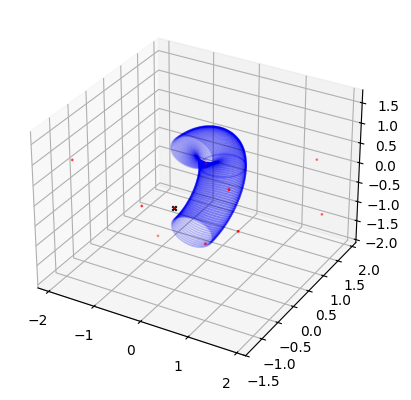

In [8]:
def find_inside_points(data):
    x_2d = data[:, 0]
    # y_2d = sqrt(y_3d^2 + z_3d^2)
    y_2d = np.sqrt(data[:, 1]**2 + data[:, 2]**2)
    upper_core = Path(np.vstack([x_core_2d, y_core_2d]).T).contains_points(np.vstack([x_2d, y_2d]).T)
    return data[upper_core]

x_test = np.random.uniform(-2, 2, 10)
y_test = np.random.uniform(-2, 2, 10)
z_test = np.random.uniform(-2, 2, 10)
test_points = np.vstack([x_test, y_test, z_test]).T

inside_points = find_inside_points(test_points)
if len(inside_points) == 0:
    print('No points inside the core')
else:
    print(inside_points[:, 0], np.sqrt(inside_points[:, 1]**2 + inside_points[:, 1]*inside_points[:, 2]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(cross_section_x, cross_section_y, cross_section_z, c='b', s=0.1, alpha=0.05)
ax.scatter(test_points[:, 0], test_points[:, 1], test_points[:, 2], c='r', s=1)
ax.scatter(inside_points[:, 0], inside_points[:, 1], inside_points[:, 2], c='black', s=10, marker='x')


In [9]:
point = test_points[7]
y_prime = np.sqrt(point[1]**2 + point[2]**2)
x_prime = point[0]
print(x_prime, y_prime)

1.7582336950587072 1.2511357867010142


In [12]:

X_polar, R_polar, Theta_polar = np.meshgrid(x_2D, r_2D, theta, indexing='ij')
X_core, Y_core, Theta_core = np.meshgrid(x_incore_2d, y_incore_2d, theta, indexing='ij')

Y_cartesian = R_polar * np.cos(Theta_polar)
Z_cartesian = R_polar * np.sin(Theta_polar)

Y_core_cartesian = Y_core * np.cos(Theta_core)
Z_core_cartesian = Y_core * np.sin(Theta_core)

# Ux_cartesian = np.broadcast_to(Ux_file[:, :, None], (300, 150, 100))
# Uy_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 150, 100)) * np.cos(theta)
# Uz_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 150, 100)) * np.sin(theta)

Ux_cartesian = np.broadcast_to(Ux_file[:, :, None], Y_cartesian.shape)
Uy_cartesian = np.broadcast_to(Ur_file[:, :, None], Y_cartesian.shape) * np.cos(theta)
Uz_cartesian = np.broadcast_to(Ur_file[:, :, None], Y_cartesian.shape) * np.sin(theta)

print(X_polar[132,35,57], Y_cartesian[132,35,57], Z_cartesian[132,35,57], Ux_cartesian[132,35,57], Uy_cartesian[132,35,57], Uz_cartesian[132,35,57])


1.5436241610738253 0.4289147830056767 -0.9633583755018967 -0.519049532637166 0.051303610950763835 -0.1152297968294906


In [13]:
print(Ux_file[132, 35], Ur_file[132, 35]*np.cos(theta[57]), Ur_file[132, 35]*np.sin(theta[57]))

-0.519049532637166 0.051303610950763835 -0.1152297968294906


Text(0.5, 0.5, 'Z')

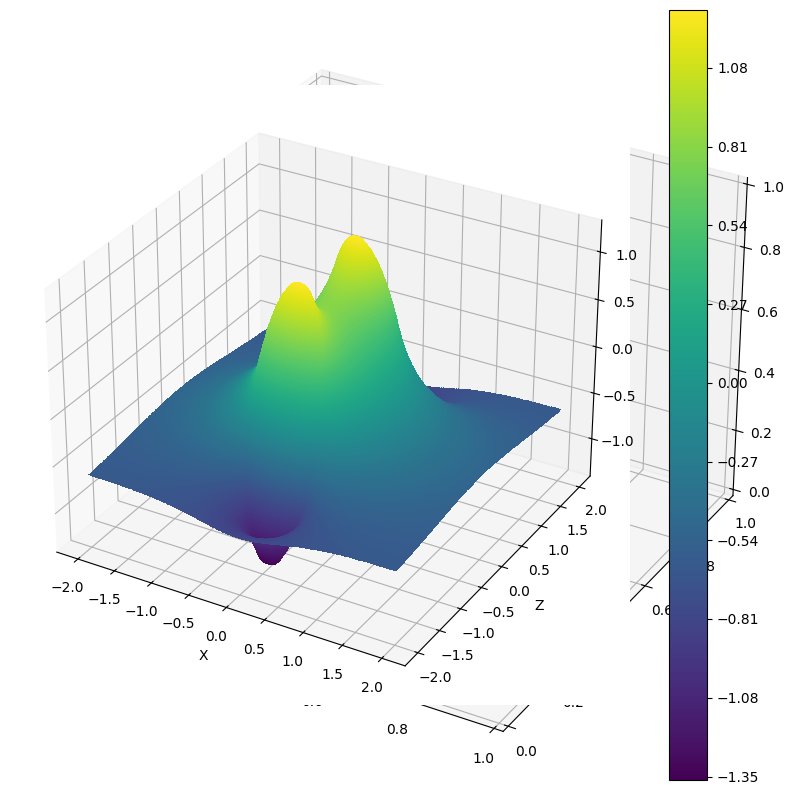

In [14]:
k = 180
ux_test = Ux_cartesian[:, :, k]
uy_test = Uy_cartesian[:, :, k]
uz_test = Uz_cartesian[:, :, k]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

c = ax.contourf3D(X_polar[:, :, k], Y_cartesian[:, :, k], ux_test, 500, cmap='viridis')
fig.colorbar(c)
ax.set_xlabel('X')
ax.set_ylabel('Z')

In [15]:
np.max(Y_cartesian[:, :, k])

np.float64(2.0)